<a href="https://colab.research.google.com/github/anisha-d08/image_classification/blob/main/Image_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [ ]:
# Gather data
# Downloaded images from Flickr Image-Scraper

In [37]:
# Preprocessing

DATADIR = '/content/drive/MyDrive/DS-Mini-Project/Images'
CATEGORIES = ['Cup', 'Rose', 'Spoon']

Target = []
Image = []
Flat_data = []

for category in CATEGORIES:
  class_t = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    img_resized = resize(img_arr,(150,150,3))
    Flat_data.append(img_resized.flatten())
    Image.append(img_resized)
    Target.append(class_t)

Flat_data = np.array(Flat_data)
Image = np.array(Image)
Target = np.array(Target)

In [38]:
df = pd.DataFrame(Flat_data)
df['Target'] = Target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.309569,0.380157,0.380157,0.317412,0.388000,0.386039,0.333098,0.401725,0.394118,0.346824,0.409569,0.399882,0.358706,0.417412,0.403804,0.370471,0.425255,0.407725,0.386157,0.433216,0.417529,0.397804,0.444980,0.423412,0.409569,0.458588,0.421333,0.427216,0.474275,0.429176,0.443020,0.489961,0.442902,0.458824,0.501961,0.450980,0.480275,0.519373,0.462510,0.499882,...,0.358588,0.284196,0.258588,0.350980,0.280275,0.254667,0.343137,0.274510,0.254549,0.323882,0.259059,0.241412,0.310157,0.253176,0.241294,0.300235,0.245333,0.233569,0.294353,0.239333,0.231373,0.294588,0.235529,0.225608,0.286510,0.229529,0.217765,0.274745,0.217765,0.208078,0.264941,0.209922,0.206118,0.257098,0.207961,0.207843,0.249373,0.207843,0.207961,0
1,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.958196,0.946431,0.926824,0.954585,0.951642,0.933937,0.941263,0.941813,0.932714,0.951815,0.955658,0.945663,0.930951,0.927029,0.919186,0.906518,0.902596,0.894753,0.886916,0.882995,0.875151,0.921111,0.917189,0.909346,0.949533,0.945611,0.937768,0.951784,0.947862,0.940019,0.928110,0.924188,0.916345,0.911374,0.911374,0.905256,0.873347,0.873347,0.867230,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [39]:
# Split the Data into Train and Test Values
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Flat_data, Target, test_size = 0.3,random_state=8)

In [40]:
# Applying SVM with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' : [1,10,100,1000], 'kernel' : ['linear']},
              {'C' : [1,10,100,1000], 'gamma' : [0.001, 0.0001, 0.00001],'kernel': ['rbf']}
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1,
       2, 0])

In [42]:
y_test

array([0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1,
       0, 2])

In [43]:
# Evaluating the model

from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
accuracy_score(y_pred, y_test)

0.7083333333333334

In [45]:
confusion_matrix(y_pred, y_test)

array([[3, 0, 2],
       [0, 8, 1],
       [4, 0, 6]])

In [46]:
# Store the model

import pickle 
pickle.dump(clf, open('image_model.p', 'wb'))

In [47]:
model = pickle.load(open('image_model.p', 'rb'))

Enter image URL > https://www.serax.com/media/catalog/product/cache/f413c32ca81e94eb8caf9f2d2260b934/B/1/B1317003_1_1.jpg
(666, 520, 3)
PREDICTED OUTPUT : Spoon


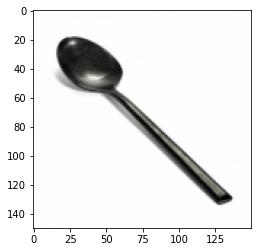

In [48]:
# Testing the model with new data

f_data = []
url = input('Enter image URL > ')
img = imread(url)
img_resized = resize(img, (150,150,3))
f_data.append(img_resized.flatten())
f_data = np.array(f_data)

print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(f_data)
y_out = CATEGORIES[y_out[0]]

print(f'PREDICTED OUTPUT : {y_out}')